<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#News-Data" data-toc-modified-id="News-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>News Data</a></span><ul class="toc-item"><li><span><a href="#Import-News-Data-(15-mnths)" data-toc-modified-id="Import-News-Data-(15-mnths)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import News Data (15 mnths)</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Filter-into-ESG-News" data-toc-modified-id="Filter-into-ESG-News-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Filter into ESG News</a></span></li><li><span><a href="#Fix-the-timestamp" data-toc-modified-id="Fix-the-timestamp-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Fix the timestamp</a></span></li></ul></li><li><span><a href="#Convert-into-vector-representation-(Fin-Bert)" data-toc-modified-id="Convert-into-vector-representation-(Fin-Bert)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Convert into vector representation (Fin-Bert)</a></span><ul class="toc-item"><li><span><a href="#Use-ProsusAI/finbert" data-toc-modified-id="Use-ProsusAI/finbert-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Use ProsusAI/finbert</a></span></li><li><span><a href="#Use-yiyanghkust/finbert-pretrain" data-toc-modified-id="Use-yiyanghkust/finbert-pretrain-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Use yiyanghkust/finbert-pretrain</a></span></li></ul></li></ul></li><li><span><a href="#ESG-Data" data-toc-modified-id="ESG-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ESG Data</a></span><ul class="toc-item"><li><span><a href="#Match-News-with-ESG-Controversy-Score" data-toc-modified-id="Match-News-with-ESG-Controversy-Score-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Match News with ESG Controversy Score</a></span></li><li><span><a href="#Training-and-Test-Set" data-toc-modified-id="Training-and-Test-Set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training and Test Set</a></span></li><li><span><a href="#Data-Preparation's-Done" data-toc-modified-id="Data-Preparation's-Done-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Preparation's Done</a></span></li></ul></li><li><span><a href="#Regression-Model" data-toc-modified-id="Regression-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regression Model</a></span><ul class="toc-item"><li><span><a href="#Choose-three-Models-(Research-First)" data-toc-modified-id="Choose-three-Models-(Research-First)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Choose three Models (Research First)</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#GridSearch" data-toc-modified-id="GridSearch-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>GridSearch</a></span></li><li><span><a href="#Best-Model-with-tuned-Hyperparams" data-toc-modified-id="Best-Model-with-tuned-Hyperparams-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Best Model with tuned-Hyperparams</a></span></li></ul></li><li><span><a href="#Numeric-to-Grade-(Refinitiv'-Rule-Based)" data-toc-modified-id="Numeric-to-Grade-(Refinitiv'-Rule-Based)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Numeric to Grade (Refinitiv' Rule Based)</a></span><ul class="toc-item"><li><span><a href="#Predict-the-Test-Set" data-toc-modified-id="Predict-the-Test-Set-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Predict the Test Set</a></span></li></ul></li><li><span><a href="#Archive" data-toc-modified-id="Archive-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Archive</a></span><ul class="toc-item"><li><span><a href="#Classification-FinBert" data-toc-modified-id="Classification-FinBert-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Classification FinBert</a></span></li><li><span><a href="#Filterout-ESG-News" data-toc-modified-id="Filterout-ESG-News-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Filterout ESG News</a></span></li><li><span><a href="#FinBert-ESG" data-toc-modified-id="FinBert-ESG-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>FinBert-ESG</a></span></li></ul></li></ul></div>

In [1]:
import torch
from transformers import BertTokenizer, BertModel

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.model_selection import GridSearchCV
from datetime import datetime, timedelta

import pandas as pd
import string
import os
import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

# download FTSE100
FTSE100_df = pd.read_csv('../data/FTSE100.csv')

# News Data

## Import News Data (15 mnths)

In [147]:
news_df = pd.read_csv('../data/output_news_headline_FTSE100.csv')
news_df.head()

,Unnamed: 0,versionCreated,text,storyId,sourceCode,firm
0,2022-03-28 11:45:30.000,2022-03-28 11:45:30+00:00,"BUZZ-Top of the Street: Safran, MTU, Heineken,...",urn:newsml:newswire.refinitiv.com:20220328:nL5...,NS:RTRS,LAND.L
1,2022-03-28 05:55:21.078,2022-03-28 05:55:21.078000+00:00,LAND SECURITIES <LAND.L>: MORGAN STANLEY RAISE...,urn:newsml:newswire.refinitiv.com:20220328:nFW...,NS:RTRS,LAND.L
2,2022-04-13 13:18:34.000,2022-04-13 13:18:34+00:00,"BUZZ-Top of the Street: Adidas, Credit Agricol...",urn:newsml:newswire.refinitiv.com:20220413:nL5...,NS:RTRS,LAND.L
3,2022-04-13 09:09:58.000,2022-04-13 09:09:58+00:00,Renting office space in London to become costl...,urn:newsml:newswire.refinitiv.com:20220413:nL3...,NS:RTRS,LAND.L
4,2022-04-13 02:58:04.872,2022-04-13 02:58:04.872000+00:00,LAND SECURITIES <LAND.L>: JP MORGAN CUTS TO NE...,urn:newsml:newswire.refinitiv.com:20220413:nFW...,NS:RTRS,LAND.L


In [148]:
news_df[['firm','sourceCode']].groupby('firm').count().sort_values('sourceCode', ascending=False).T

firm,SHEL.L,BP.L,HSBA.L,AZN.L,RIO.L,GSK.L,BARC.L,ABDN.L,GLEN.L,BT.L,STAN.L,VOD.L,LSEG.L,ULVR.L,LLOY.L,TSCO.L,ICAG.L,SSE.L,NWG.L,DGE.L,SBRY.L,PRU.L,RR.L,BAES.L,OCDO.L,NG.L,ANTO.L,BATS.L,RKT.L,AV.L,ENT.L,BRBY.L,FLTRF.L,ABF.L,SDR.L,JD.L,NXT.L,SMDS.L,BDEV.L,LGEN.L,IHG.L,HLN.L,WPP.L,PSON.L,TW.L,PSN.L,FRAS.L,MNG.L,CRH.L,CCH.L,BEZG.L,III.L,HRGV.L,KGF.L,IMB.L,SKG.L,BKGH.L,INF.L,BMEB.L,PHNX.L,CPG.L,MNDI.L,BNZL.L,JMAT.L,ITRK.L,AHT.L,FRES.L,WTB.L,EXPN.L,SN.L,HSX.L,AAF.L,FCIT.L,RS1R.L,LAND.L,RMV.L,SJP.L,UU.L,SGE.L,AUTOA.L,CRDA.L,REL.L,BLND.L,CTEC.L,SMIN.L,SGRO.L,RTO.L,WEIR.L,SPX.L,HLMA.L,UTG.L,DCC.L,SVT.L,PSH.AS,SMT.L
sourceCode,2643,2206,1965,1790,1737,1604,1599,1598,1454,1264,1061,1043,994,895,840,809,802,799,706,706,678,670,667,541,521,505,499,494,487,480,454,447,438,412,411,408,374,374,359,358,341,330,328,315,312,311,308,297,291,280,276,258,253,250,250,249,227,225,223,222,221,209,209,202,200,200,199,192,192,188,188,188,184,180,172,172,170,170,162,160,160,158,152,149,146,144,144,128,114,112,106,101,93,74,16


## Preprocessing

### Filter into ESG News

In [149]:
# dummy dataframe of headline for sentiment result
esg_glossaries = pd.read_csv('../data/ESG Score Compile - Glossary.csv')                 

# remove unused row number
esg_glossaries = esg_glossaries.drop(['No'], axis=1)

# lower the glossaries
esg_glossaries['Keywords'] = esg_glossaries['Keywords'].str.lower()

# remove duplicates
esg_glossaries = esg_glossaries.drop_duplicates(['Keywords'])

In [150]:
def ESG_news_filter(company_df, text_col='text', inplace=True):
    datapath=os.getcwd()[:-len('notebook')] + "data/"
    ESG_data=pd.read_csv(datapath+'Categorized_ESG_data.csv')
    
    X=ESG_data['T'].str.lower()
    y=ESG_data['S']
    
    cv = CountVectorizer()
    features = cv.fit_transform(X)
    
    pre_trained_model = GaussianNB()
    pre_trained_model.fit(features.toarray(),y)
    
    X_company=company_df[text_col]
    Xf_company=cv.transform(X_company)
    
    ESG=pre_trained_model.predict(Xf_company.toarray())
    
    company_df['ESG']=ESG
    
    if inplace==True:
        return company_df[company_df['ESG']==1].drop(columns='ESG')
    else:
        return company_df


In [151]:
def filter_esg_news(df, esg_glossaries, column, verbose = False):

    ESG_news_filter = pd.DataFrame()
    cnt = 0
    for key in esg_glossaries.Keywords:
        cnt+=1
        ESG_news_filter = pd.concat([ESG_news_filter, df[df[column].str.contains(key)]])

        if verbose:
            if cnt % 10 == 0:
                print(cnt)
            
    return ESG_news_filter

In [152]:
def filter_companies(df):
    copy_df = df.copy()
    
    firm_names = [f.split(' ')[0].lower() for f in FTSE100_df['Name']]
    copy_df['flag'] = 0
    
    for firm in firm_names:
        
        index = copy_df[copy_df['text_pp'].str.contains(firm)].index.tolist()
        copy_df.loc[index,'flag'] = 1
        
    return copy_df

In [153]:
def text_preprocessing_v2(df, types = 1):
    df_copy = df.copy()
    print('total news:',df_copy.shape[0])

    # assign a new seperate column text_pp for preprocessing
    df_copy['text_pp'] = df_copy.text

    # make the string lower
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: x.lower())

    # remove the punctuation
    # translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    # df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: x.translate(translator))

    # remove unnecessary word
    # df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: x.replace('rpt',''))

    # delete unnecessary double-space
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: ' '.join(x.split()))
    
    if types == 1:
        
        # filter out only ESG news (model)
        df_copy = ESG_news_filter(df_copy, text_col='text_pp', inplace=True)
        print('filter out non-esg news:', df_copy.shape[0])
        
    else:
        
        # filter out only ESG news (conventional)
        df_copy = filter_esg_news(df_copy, esg_glossaries, 'text_pp')
        print('filter out non-esg news:', df_copy.shape[0])
        
    # remove duplicates of headers
    df_copy = df_copy.drop_duplicates(['text_pp'])
    print('preprocessing and drop duplicates news:', df_copy.shape[0])
    
    df_copy = df_copy.drop(['Unnamed: 0'], axis=1)
    
    df_copy = filter_companies(df_copy)
    print('contain firm name #rows:', df_copy[df_copy['flag'] == 1].shape[0])

    return df_copy[df_copy['flag'] == 1].reset_index(drop=True)

In [154]:
ESG_news_df = text_preprocessing_v2(news_df, types = 1)
ESG_news_df2 = text_preprocessing_v2(news_df, types = 2)

total news: 47193
filter out non-esg news: 23484
preprocessing and drop duplicates news: 18575
contain firm name #rows: 14635
total news: 47193
filter out non-esg news: 4309
preprocessing and drop duplicates news: 3429
contain firm name #rows: 2656


In [79]:
# ESG_news_df = ESG_news_df[ESG_news_df['ESG'] == 1]
ESG_news_df = ESG_news_df.reset_index(drop=True)

In [156]:
ESG_news_df = ESG_news_df2.copy()

### Fix the timestamp

In [157]:
def timestamp_preprocessing(df, cols = 'versionCreated'):
    
    df_copy = df.copy()
    
    df_copy[cols] = df_copy[cols].apply(lambda x: x[:19])
    df_copy[cols] = pd.to_datetime(df_copy[cols])
    
    df_copy['year_month'] = df_copy[cols].apply(lambda x: datetime.strftime(x, '%Y-%m'))
    df_copy['year'] = df_copy[cols].apply(lambda x: datetime.strftime(x, '%Y'))

    return df_copy

In [158]:
ESG_news_df = timestamp_preprocessing(ESG_news_df)

In [159]:
ESG_news_df = ESG_news_df.sort_values(['firm','versionCreated'])
ESG_news_df.reset_index(drop=True, inplace = True)

## Convert into vector representation (Fin-Bert)

### Use ProsusAI/finbert

link: https://github.com/ProsusAI/finBERT/tree/master

In [160]:
# Pretrained language model
model_name = 'ProsusAI/finbert'
tokenizer = BertTokenizer.from_pretrained(model_name)
language_model = BertModel.from_pretrained(model_name)

Some weights of the model checkpoint at ProsusAI/finbert were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [161]:
print(ESG_news_df.shape[0])

2656


In [162]:
ESG_news_df.head(2)

,versionCreated,text,storyId,sourceCode,firm,text_pp,flag,year_month,year
0,2022-04-05 06:01:48,AIRTEL AFRICA - FOR NINE-MONTH PERIOD TO 31 DE...,urn:newsml:newswire.refinitiv.com:20220405:nAS...,NS:RTRS,AAF.L,airtel africa - for nine-month period to 31 de...,1,2022-04,2022
1,2022-04-29 09:41:13,AIRTEL AFRICA - APPROVAL AFFORDS GROUP OPPORTU...,urn:newsml:newswire.refinitiv.com:20220429:nTU...,NS:RTRS,AAF.L,airtel africa - approval affords group opportu...,1,2022-04,2022


In [163]:
semantics_ftse100_df = pd.DataFrame()

for firm in ESG_news_df.firm.unique():
    
    for year in ESG_news_df[ESG_news_df.firm == firm].year.unique():
        
        copy_df = ESG_news_df[(ESG_news_df['firm'] == firm) & (ESG_news_df['year'] == year)].copy()
        esg_news = [news for news in copy_df['text_pp']]
        
        overall_semantics = []
        text_embeddings = []
        
        print(firm, year, 'started')

        for news in esg_news:
            # Sentiment extraction
            inputs = tokenizer.encode_plus(news, add_special_tokens=True, return_tensors='pt')
            outputs = language_model(**inputs)

            # Extract sentiment score from model output
            sentiment_score = outputs.pooler_output  

            # Text embedding
            text_embedding = outputs.last_hidden_state.mean(dim=1)  # Average pooling of token embeddings

            overall_semantics.append(sentiment_score)
            text_embeddings.append(text_embedding)

        # Pooling operations
        semantics_avg_vector = torch.cat(overall_semantics, dim=0).mean(dim=0)  
        text_embedding_avg_vector = torch.cat(text_embeddings, dim=0).mean(dim=0) 
        
        
        temp_semantic_df = pd.DataFrame(semantics_avg_vector.detach()).T
        temp_semantic_df['year'] = year
        temp_semantic_df['firm'] = firm
        
        semantics_ftse100_df = pd.concat([semantics_ftse100_df, temp_semantic_df])

AAF.L 2022 started
ABDN.L 2022 started
ABDN.L 2023 started
ABF.L 2022 started
ABF.L 2023 started
AHT.L 2022 started
ANTO.L 2022 started
ANTO.L 2023 started
AUTOA.L 2022 started
AV.L 2022 started
AV.L 2023 started
AZN.L 2022 started
AZN.L 2023 started
BAES.L 2022 started
BAES.L 2023 started
BARC.L 2022 started
BARC.L 2023 started
BATS.L 2022 started
BATS.L 2023 started
BDEV.L 2022 started
BDEV.L 2023 started
BEZG.L 2022 started
BEZG.L 2023 started
BKGH.L 2022 started
BKGH.L 2023 started
BLND.L 2022 started
BMEB.L 2022 started
BNZL.L 2022 started
BNZL.L 2023 started
BP.L 2022 started
BP.L 2023 started
BRBY.L 2022 started
BRBY.L 2023 started
BT.L 2022 started
BT.L 2023 started
CCH.L 2022 started
CPG.L 2022 started
CRDA.L 2022 started
CRDA.L 2023 started
CRH.L 2022 started
CRH.L 2023 started
CTEC.L 2022 started
DCC.L 2022 started
DCC.L 2023 started
DGE.L 2022 started
DGE.L 2023 started
ENT.L 2022 started
ENT.L 2023 started
EXPN.L 2022 started
EXPN.L 2023 started
FLTRF.L 2022 started
FLTRF.

In [164]:
semantics_ftse100_df = pd.concat([semantics_ftse100_df[['firm','year']], \
                                  semantics_ftse100_df.drop(['firm','year'], axis=1)], axis=1)

In [165]:
semantics_ftse100_df.head()

,firm,year,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,...,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,AAF.L,2022,-0.316090,0.325633,0.492556,-0.050070,0.381271,0.446845,-0.207054,-0.637495,0.801130,-0.353742,0.138251,0.306494,0.530853,-0.876837,0.362748,0.741820,0.654941,0.512792,-0.387770,0.353789,0.221659,0.313713,0.564235,-0.686227,-0.642365,0.196502,0.282279,0.649435,0.512119,0.544681,0.129982,-0.639737,-0.610100,0.830135,0.137060,-0.321796,-0.235919,-0.247098,0.819274,0.557975,-0.688157,-0.592286,0.389770,-0.598341,0.433813,0.849988,-0.195008,-0.738388,...,0.211936,0.278461,0.974894,-0.612834,-0.637121,0.378367,0.965431,0.293928,-0.418566,0.562169,-0.840459,0.166071,0.452617,-0.400972,0.052950,-0.782747,0.489511,0.470937,0.196611,-0.337015,0.371481,0.868773,0.855808,-0.572468,-0.146085,-0.712325,0.090163,-0.206568,-0.636871,-0.166343,-0.773116,0.186292,0.046566,0.336271,0.012829,0.677988,0.498305,-0.170390,0.782914,0.166265,-0.499663,-0.263030,0.180643,0.616740,-0.715521,0.880630,-0.490878,-0.111745,0.736818,0.420092
0,ABDN.L,2022,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,0.122388,-0.347592,-0.396832,-0.563186,0.683186,0.262962,-0.069341,0.276556,-0.175707,-0.203021,-0.141699,0.091912,0.065182,0.437429,0.816609,-0.112512,0.104719,0.203781,0.768193,-0.498873,0.321900,0.275603,0.387095,-0.379965,0.158648,-0.382170,0.071086,-0.811444,-0.386997,0.337908,-0.166414,0.063644,-0.038296,-0.303566,0.263800,0.414974,0.594210,0.471593,0.112446,-0.643058,0.046191,...,-0.477072,-0.238051,0.017877,-0.260618,0.202387,-0.243256,0.164093,0.725767,0.188491,0.111767,0.011186,-0.308478,-0.198662,-0.270041,-0.012713,-0.177616,-0.456001,-0.271963,0.192961,0.348749,0.802634,-0.003278,-0.406385,-0.251795,-0.321152,0.053417,-0.552242,-0.680628,0.189707,-0.413760,0.117826,-0.506038,0.726489,-0.660611,-0.255183,-0.076838,0.145655,0.619158,0.059788,-0.630201,-0.368234,-0.243799,0.812860,0.249883,-0.261393,0.220430,-0.307368,-0.685380,-0.035406,0.278564
0,ABDN.L,2023,-0.622167,0.061416,0.075657,0.221786,0.514692,0.215489,0.116194,-0.447645,0.469101,-0.496500,-0.416357,0.643700,0.942990,-0.831218,0.675118,0.409902,0.261756,0.317859,-0.233683,0.203468,0.421189,0.500167,0.438117,-0.472212,-0.357929,0.577314,-0.173510,0.853404,0.819504,0.648035,-0.095228,-0.346646,-0.985788,0.662574,-0.145159,-0.625079,0.085507,-0.352556,0.738200,0.363667,-0.877757,-0.340495,0.508361,-0.029270,0.630389,0.679076,-0.499744,-0.530474,...,-0.172143,0.073702,0.920485,-0.853243,-0.167572,0.164348,0.966205,0.441224,-0.168116,0.714890,-0.737563,-0.079925,0.201389,-0.578543,0.204507,-0.833837,0.102286,0.028409,0.414291,0.035770,0.500612,0.723475,0.414527,-0.737513,-0.274086,-0.507514,-0.322532,-0.499997,-0.318313,-0.355183,-0.523481,-0.176062,0.353427,-0.054711,-0.229069,0.465380,0.564613,0.173182,0.583145,-0.305341,-0.783045,-0.200103,0.529174,0.836835,-0.773441,0.950753,-0.706481,-0.342184,0.481820,0.504579
0,ABF.L,2022,0.079495,0.208908,-0.001545,-0.075916,-0.067437,0.150376,-0.245490,-0.317162,0.147601,0.224127,-0.087240,0.121800,-0.177804,-0.081117,-0.201433,0.100512,0.026057,0.251126,-0.150790,0.258775,-0.045470,0.159487,0.016471,-0.236865,-0.315805,0.110480,-0.006048,-0.048547,-0.137026,0.074173,0.135319,-0.259947,0.088937,0.350297,-0.147010,0.217294,-0.192906,0.220295,0.323942,0.276412,0.017288,-0.229908,-0.183651,0.203501,0.006428,0.385909,0.198250,-0.334298,...,0.006039,0.190039,0.310534,0.074152,-0.324238,0.118129,0.292875,0.153624,-0.138877,-0.122159,-0.015683,0.135728,0.219379,0.127472,-0.360102,-0.121958,0.088398,0.163103,-0.220107,-0.068620,0.149303,0.285922,0.131601,-0.016180,0.109038,-0.274674,-0.089198,0.120188,-0.223363,0.064035,-0.167348,-0.034307,0.122191,-0.058325,0.261353,0.290768,-0.18658

In [166]:
semantics_ftse100_df = semantics_ftse100_df.reset_index(drop=True)

In [167]:
test_df.to_csv('../data/semantics_FTSE100_esg_filter_contains.csv', index=None)

### Use yiyanghkust/finbert-pretrain

link: https://github.com/yya518/FinBERT/blob/master/finetune.ipynb

In [66]:
# Pretrained language model
model_name = 'yiyanghkust/finbert-pretrain'
tokenizer = BertTokenizer.from_pretrained(model_name)
language_model = BertModel.from_pretrained(model_name)

Some weights of the model checkpoint at yiyanghkust/finbert-pretrain were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [67]:
semantics_ftse100_v2_df = pd.DataFrame()

for firm in ESG_news_df.firm.unique():
    
    for year in ESG_news_df[ESG_news_df.firm == firm].year.unique():
        
        copy_df = ESG_news_df[(ESG_news_df['firm'] == firm) & (ESG_news_df['year'] == year)].copy()
        esg_news = [news for news in copy_df['text_pp']]
        
        overall_semantics = []
        text_embeddings = []
        
        print(firm, year, 'started')

        for news in esg_news:
            # Sentiment extraction
            inputs = tokenizer.encode_plus(news, add_special_tokens=True, return_tensors='pt')
            outputs = language_model(**inputs)

            # Extract sentiment score from model output
            sentiment_score = outputs.pooler_output  

            # Text embedding
            text_embedding = outputs.last_hidden_state.mean(dim=1)  # Average pooling of token embeddings

            overall_semantics.append(sentiment_score)
            text_embeddings.append(text_embedding)

        # Pooling operations
        semantics_avg_vector = torch.cat(overall_semantics, dim=0).mean(dim=0)  
        text_embedding_avg_vector = torch.cat(text_embeddings, dim=0).mean(dim=0) 
        
        
        temp_semantic_df = pd.DataFrame(semantics_avg_vector.detach()).T
        temp_semantic_df['year'] = year
        temp_semantic_df['firm'] = firm
        
        
        semantics_ftse100_v2_df = pd.concat([semantics_ftse100_v2_df, temp_semantic_df])

AAF.L 2022 started
ABDN.L 2022 started
ABDN.L 2023 started
ABF.L 2022 started
ABF.L 2023 started
AHT.L 2022 started
ANTO.L 2022 started
ANTO.L 2023 started
AUTOA.L 2022 started
AV.L 2022 started
AV.L 2023 started
AZN.L 2022 started
AZN.L 2023 started
BAES.L 2022 started
BAES.L 2023 started
BARC.L 2022 started
BARC.L 2023 started
BATS.L 2022 started
BATS.L 2023 started
BDEV.L 2022 started
BDEV.L 2023 started
BEZG.L 2022 started
BEZG.L 2023 started
BKGH.L 2022 started
BKGH.L 2023 started
BLND.L 2022 started
BMEB.L 2022 started
BNZL.L 2022 started
BNZL.L 2023 started
BP.L 2022 started
BP.L 2023 started
BRBY.L 2022 started
BRBY.L 2023 started
BT.L 2022 started
BT.L 2023 started
CCH.L 2022 started
CPG.L 2022 started
CRDA.L 2022 started
CRDA.L 2023 started
CRH.L 2022 started
CRH.L 2023 started
CTEC.L 2022 started
DCC.L 2022 started
DCC.L 2023 started
DGE.L 2022 started
DGE.L 2023 started
ENT.L 2022 started
ENT.L 2023 started
EXPN.L 2022 started
EXPN.L 2023 started
FLTRF.L 2022 started
FLTRF.

In [73]:
semantics_ftse100_v2_df = pd.concat([semantics_ftse100_v2_df[['firm','year']], semantics_ftse100_v2_df.drop(['firm','year'], axis=1)], axis=1)

In [110]:
semantics_ftse100_v2_df = semantics_ftse100_v2_df.reset_index(drop=True)

In [111]:
semantics_ftse100_v2_df.head()

,firm,year,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,...,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,AAF.L,2022,0.997741,0.029028,-0.997513,0.334838,0.712012,0.019522,-0.644898,-0.072796,0.963206,-0.093572,-0.001303,0.731549,-0.999912,-0.004749,0.135107,-0.198207,-0.201953,-0.032121,-0.130995,-0.713439,0.684404,0.995149,0.999928,0.845180,0.402251,0.999958,0.869724,0.113720,0.024483,0.048140,0.015801,0.037154,-0.117185,-0.368511,-0.170509,0.999451,-0.266585,-0.251341,0.215471,-0.085773,0.122216,0.095172,0.242770,0.109276,-0.183281,-0.146718,0.091036,0.007633,...,0.237865,-0.278159,0.129780,-0.354730,-0.868910,-0.989849,-0.918077,0.158916,-0.999907,0.095612,-0.060056,-0.009567,-0.999251,-0.215684,0.098297,0.003679,0.136678,0.166769,0.103936,0.123942,0.125368,-0.213877,-0.018230,0.342590,0.999801,-0.978898,0.234214,0.064304,-0.051108,-0.016347,-0.976152,-0.998102,-0.073052,0.843195,0.079209,-0.249616,0.998655,-0.999695,0.837114,0.050972,0.230975,-0.072215,-0.746568,0.092619,0.279348,-0.166760,-0.989930,0.589905,0.584731,0.049186
1,ABDN.L,2022,0.996819,0.095085,-0.998613,0.568138,0.788253,0.214046,-0.870445,-0.102602,0.995655,-0.104370,-0.010163,0.719127,-0.999712,-0.030351,0.018541,-0.023877,-0.125272,0.017154,-0.203656,-0.914491,0.387899,0.997920,0.999971,0.984138,0.028084,0.999976,0.989630,0.236592,0.203242,-0.079100,0.059357,-0.053562,-0.015643,-0.200015,-0.061069,0.999921,-0.195509,-0.217696,0.106379,-0.054508,0.093138,0.118872,0.773654,-0.009733,-0.204403,-0.086836,-0.064186,-0.057688,...,0.146257,-0.199227,0.271625,-0.205517,-0.871871,-0.997547,-0.989301,-0.066180,-0.999936,0.074904,0.086331,-0.075209,-0.999763,-0.203907,-0.062041,0.204395,0.104943,0.163442,0.291025,0.097555,-0.130973,-0.060302,-0.204357,0.222007,0.999965,-0.993112,0.013240,0.028441,-0.043148,-0.123588,-0.983625,-0.998408,-0.512533,0.776308,0.048624,0.064667,0.999083,-0.999676,0.922865,0.007692,-0.067436,0.098027,-0.872003,0.068767,0.307862,-0.002922,-0.974779,0.810444,0.785232,0.035567
2,ABDN.L,2023,0.989547,0.150536,-0.999749,0.047239,0.954630,0.151744,-0.988769,-0.238919,0.999199,-0.109350,0.035160,0.317401,-0.999984,0.089074,0.122602,-0.010561,-0.106659,-0.108626,-0.137339,-0.985335,0.619444,0.991225,0.999954,0.963679,0.483892,0.999970,0.997173,0.081734,0.150592,0.106016,0.019440,-0.013757,0.105857,-0.004731,-0.060471,0.999673,-0.262355,-0.090079,0.232048,0.031951,0.114128,0.285968,0.906139,0.158564,-0.098235,-0.103863,0.127101,-0.054738,...,0.133307,-0.236596,0.381947,-0.681377,-0.712286,-0.999416,-0.994456,-0.067077,-0.999947,0.041724,0.100697,-0.067905,-0.999445,-0.163924,-0.038487,0.162933,0.374952,0.102534,0.395389,0.173159,-0.021496,-0.063033,-0.181556,0.270891,0.999869,-0.969155,-0.031581,0.089514,-0.100322,-0.033030,-0.996256,-0.999651,0.011610,0.885921,0.143838,-0.125996,0.998634,-0.999975,0.993254,-0.014059,0.188017,-0.028435,-0.922217,0.145202,0.372554,0.211096,-0.996154,0.982039,0.958495,0.119671
3,ABF.L,2022,0.995933,0.117803,-0.998486,0.447475,0.712604,0.120528,-0.818661,-0.153640,0.982410,-0.072859,0.171956,0.755239,-0.999852,-0.248553,0.235087,-0.139464,0.014628,0.037759,-0.195925,-0.886161,0.440845,0.996099,0.999915,0.961138,-0.022704,0.999972,0.984891,-0.000657,0.002406,-0.083749,0.252296,0.094640,0.018567,-0.224951,0.086159,0.999873,-0.084604,-0.142325,0.020323,0.074382,-0.117331,0.291986,0.767179,0.039035,-0.024188,-0.028403,0.112348,0.120512,...,0.279936,-0.172295,-0.015387,-0.437296,-0.847734,-0.991688,-0.982044,-0.090973,-0.999944,0.195029,0.160253,-0.076432,-0.999666,-0.080111,0.153318,0.100536,0.151402,0.064145,0.116562,0.234809,0.036705,-0.278851,-0.068793,0.410675,0.999925,-0.978843,-0.100703,0.045183,-0.187457,0.064230,-0.995666,-0.995277,-0.297842,0.683482,-0.007643,-0.026577,0.9

# ESG Data

In [168]:
def grade_calculation_og(score):
    val = 'A+'

    if score <= 0.083333:
        val = 'D-'
    elif 0.083333 < score <= 0.166666: 
        val = 'D'
    elif 0.166666 < score <= 0.250000: 
        val = 'D+'
    elif 0.250000 < score <= 0.333333: 
        val = 'C-'
    elif 0.333333 < score <= 0.416666: 
        val = 'C'
    elif 0.416666 < score <= 0.500000: 
        val = 'C+'
    elif 0.500000 < score <= 0.583333: 
        val = 'B-'
    elif 0.583333 < score <= 0.666666: 
        val = 'B'
    elif 0.666666 < score <= 0.750000: 
        val = 'B+'
    elif 0.750000 < score <= 0.833333: 
        val = 'A-'
    elif 0.833333 < score <= 0.916666: 
        val = 'A'

    return val

In [169]:
def grade_calculation(score):
    score = score / 100
    
    if score <= 0.250000:
        val = 'D'
    elif score <= 0.500000: 
        val = 'C'
    elif score <= 0.750000: 
        val = 'B'
    elif score > 0.75: 
        val = 'A'

    return val

In [170]:
ESG_df = pd.read_csv('../data/output_ESGControversyScore_FTSE100.csv')

In [171]:
ESG_df = ESG_df.iloc[:, 1:]
ESG_df['Date'] = ESG_df['Date'].astype(str)
ESG_df = ESG_df[ESG_df.Date != 'nan'].reset_index(drop=True)
ESG_df = timestamp_preprocessing(ESG_df, cols = 'Date')

In [172]:
ESG_df.head()

,Instrument,ESG Controversies Score Grade,ESG Controversies Score,Date,year_month,year
0,LAND.L,A+,100.0,2022-03-31,2022-03,2022
1,LAND.L,A+,100.0,2021-03-31,2021-03,2021
2,LAND.L,A+,100.0,2020-03-31,2020-03,2020
3,LAND.L,A+,100.0,2019-03-31,2019-03,2019
4,LAND.L,A+,100.0,2018-03-31,2018-03,2018


In [173]:
ESG_df['ESG Controversies Score Simple'] = ESG_df['ESG Controversies Score'].apply(lambda x: grade_calculation(x))

In [174]:
ESG_df['ESG Controversies Score Simple'].unique()

array(['A', 'C', 'D', 'B'], dtype=object)

## Match News with ESG Controversy Score

In [182]:
semantics_ftse100_df = semantics_ftse100_ML_df.copy()

In [183]:
for idx in range(semantics_ftse100_df.shape[0]):
    
    f = semantics_ftse100_df.iloc[idx, 0]
    y = semantics_ftse100_df.iloc[idx, 1]
    
    print(f,y)
    
    copy_df = ESG_df[(ESG_df['year'] == y) & (ESG_df['Instrument'] == f)].copy().reset_index(drop=True)
    
    if copy_df.shape[0] != 0:
    
        semantics_ftse100_df.loc[idx, 'ESG Controversies Score'] = copy_df['ESG Controversies Score'][0]
        semantics_ftse100_df.loc[idx, 'ESG Controversies Score Grade'] = copy_df['ESG Controversies Score Grade'][0]
        
    else:
        
        semantics_ftse100_df.loc[idx, 'ESG Controversies Score'] = -1
        semantics_ftse100_df.loc[idx, 'ESG Controversies Score Grade'] = 'Unknown'

AAF.L 2022
AAF.L 2023
ABDN.L 2022
ABDN.L 2023
ABF.L 2022
ABF.L 2023
AHT.L 2022
AHT.L 2023
ANTO.L 2022
ANTO.L 2023
AUTOA.L 2022
AUTOA.L 2023
AV.L 2022
AV.L 2023
AZN.L 2022
AZN.L 2023
BAES.L 2022
BAES.L 2023
BARC.L 2022
BARC.L 2023
BATS.L 2022
BATS.L 2023
BDEV.L 2022
BDEV.L 2023
BEZG.L 2022
BEZG.L 2023
BKGH.L 2022
BKGH.L 2023
BLND.L 2022
BLND.L 2023
BMEB.L 2022
BMEB.L 2023
BNZL.L 2022
BNZL.L 2023
BP.L 2022
BP.L 2023
BRBY.L 2022
BRBY.L 2023
BT.L 2022
BT.L 2023
CCH.L 2022
CCH.L 2023
CPG.L 2022
CPG.L 2023
CRDA.L 2022
CRDA.L 2023
CRH.L 2022
CRH.L 2023
CTEC.L 2022
CTEC.L 2023
DCC.L 2022
DCC.L 2023
DGE.L 2022
DGE.L 2023
ENT.L 2022
ENT.L 2023
EXPN.L 2022
EXPN.L 2023
FCIT.L 2022
FCIT.L 2023
FLTRF.L 2022
FLTRF.L 2023
FRAS.L 2022
FRAS.L 2023
FRES.L 2022
FRES.L 2023
GLEN.L 2022
GLEN.L 2023
GSK.L 2022
GSK.L 2023
HLMA.L 2022
HLMA.L 2023
HLN.L 2022
HLN.L 2023
HRGV.L 2022
HRGV.L 2023
HSBA.L 2022
HSBA.L 2023
HSX.L 2022
HSX.L 2023
ICAG.L 2022
ICAG.L 2023
IHG.L 2022
IHG.L 2023
III.L 2022
III.L 2023
IMB.L 

## Training and Test Set

In [177]:
train_df = semantics_ftse100_df[semantics_ftse100_df['ESG Controversies Score Grade'] != 'Unknown']
print(train_df.shape[0])

48


In [178]:
test_df = semantics_ftse100_df[semantics_ftse100_df['ESG Controversies Score Grade'] == 'Unknown']
print(test_df.shape[0])

119


In [179]:
train_df.to_csv('../data/ML_Data/train_footsie_contains.csv', index=None)
test_df.to_csv('../data/ML_Data/test_footsie_contains.csv', index=None)

## Data Preparation's Done

# Regression Model

In [109]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [110]:
train_df = train_df.drop(['firm','year','ESG Controversies Score Grade'], axis=1).reset_index(drop=True)

In [111]:
y = train_df.iloc[:,-1]
X = train_df.iloc[:,:-1]

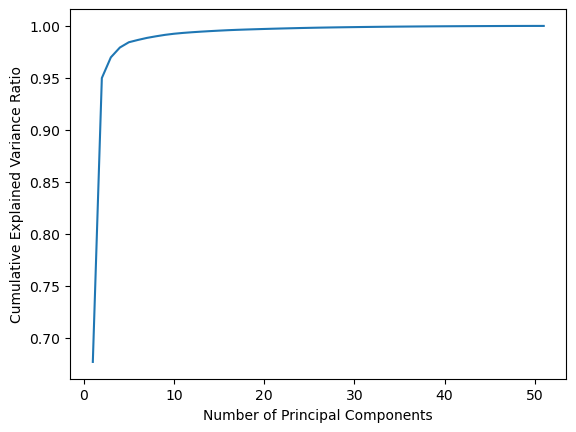

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to Xtrn_mn
pca = PCA()

pca.fit(X)

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_exp_var_ratio = np.cumsum(explained_var_ratio)

# Plot the graph
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_exp_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [113]:
#(3) Your code goes here

# Calculate the cumulative explained variance ratio
cumulative_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of principal components required to explain a certain percentage of the total variance
for percent in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    num_components = np.argmax(cumulative_explained_var_ratio >= percent) + 1
    print(f"Minimum number of principal components to explain {percent*100}% of variance: {num_components}")

Minimum number of principal components to explain 50.0% of variance: 1
Minimum number of principal components to explain 60.0% of variance: 1
Minimum number of principal components to explain 70.0% of variance: 2
Minimum number of principal components to explain 80.0% of variance: 2
Minimum number of principal components to explain 90.0% of variance: 2
Minimum number of principal components to explain 95.0% of variance: 3
Minimum number of principal components to explain 99.0% of variance: 8


In [115]:
pca = PCA(n_components=num_components)

In [116]:
X_pca = pca.fit_transform(X)

In [133]:
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=12)

In [134]:
# Create an XGBoostRegressor model
model = XGBRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of each tree
}

In [135]:
grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Root Mean Squared Error: 40.78916890632803


In [211]:
grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Root Mean Squared Error: 22.841653795025273


In [136]:
model = XGBRegressor(**grid_search.best_params_)

In [137]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [138]:
y_pred = model.predict(X_val)
print(y_pred)

[94.524704 79.65725  94.23037  94.9522   78.38174  93.92709  84.38458
 94.589066 91.41316  42.877056 82.625305]


In [139]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]

In [140]:
y_val_grade = [grade_calculation(sc) for sc in y_val]

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(y_pred_grade, y_val_grade)

0.45454545454545453

In [143]:
y_pred_grade

['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'A']

In [144]:
y_val_grade

['A', 'C', 'D', 'B', 'A', 'A', 'D', 'B', 'A', 'B', 'A']

## Choose three Models (Research First)

## Cross Validation

## GridSearch

## Best Model with tuned-Hyperparams

# Numeric to Grade (Refinitiv' Rule Based)

## Predict the Test Set

# Archive

## Classification FinBert

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# create a tokenizer object
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

# fetch the pretrained model 
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

def sentim_analyzer(df, tokenizer, model, headline_colum = 'headline'):
    ''' Given a df that contains a column 'headline' with article healine texts, it runs inference on the healine with the 'model' (FinBert) 
       and inserts output sentiment features into the dataframe in the respective columns (Positive_sentim, Negative_sentim, Neutral_sentim)
       
        Parameters :
          df : A dataframe that contains headlines in a column called 'headline' . 
          tokenizer(AutoTokenizer object) : A pre-processing tokenizer object from Hugging Face lib. 
          model (AutoModelForSequenceClassification object) : A hugging face transformer model.     
          
          returns df : The initial dataframe with the 3 sentiment features as columns for each headline'''
    
    for i in df.index:
        try:
            headline = df.loc[i, headline_colum]
        except:
            return print(f' \'{headline_colum}\' column might be missing from dataframe')
        # Pre-process input phrase
        
        input = tokenizer(headline, padding = True, truncation = True, return_tensors='pt')
        
        # Estimate output
        output = model(**input)
        # Pass model output logits through a softmax layer.
        predictions = torch.nn.functional.softmax(output.logits, dim=-1)
        df.loc[i, 'Positive'] = predictions[0][0].tolist()
        df.loc[i, 'Negative'] = predictions[0][1].tolist()
        df.loc[i, 'Neutral']  = predictions[0][2].tolist()
    # rearrange column order
    try:
        df = df[['date', 'stock', 'Open', 'Close', 'Volume',  'headline', 'Positive', 'Negative', 'Neutral','Price_change']]
    except:
        pass
    return df

## Filterout ESG News

In [49]:
news_clean_df = news_df[news_df['ESG'] == 1].reset_index(drop=True)

from transformers import BertTokenizer, BertForSequenceClassification, pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-esg',num_labels=4)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-esg')
nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer)

results = nlp(['Rhonda has been volunteering for several years for a variety of charitable community programs.',
              'Rhonda has been volunteering for several years for a variety of charitable community programs.'])
print(results) # [{'label': 'Social', 'score': 0.9906041026115417}]

news_headlines = [new for new in news_df['text_pp']]

results = nlp(news_headlines)

news_500 = pd.DataFrame(news_df['text_pp'])

for i, value in enumerate(results):
    
    news_500.loc[i:, 'label'] = value['label']
    news_500.loc[i:, 'score'] = value['score']

news_500['ESG_Maia'] = news_df['ESG']

news_500.reset_index(drop=True, inplace=True)

pd.concat([news_500[news_500['ESG_Maia'] == 1].sample(50), news_500[news_500['ESG_Maia'] == 0].sample(50)]).to_csv('/Users/yogi/Desktop/ESG_result.csv')

In [ ]:
filter out non-esg news

## FinBert-ESG

In [45]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-esg',num_labels=4)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-esg')
nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer)

results = nlp(['Rhonda has been volunteering for several years for a variety of charitable community programs.',
              'Rhonda has been volunteering for several years for a variety of charitable community programs.'])
print(results) # [{'label': 'Social', 'score': 0.9906041026115417}]

news_headlines = [new for new in news_df['text_pp']]

results = nlp(news_headlines)

news_500 = pd.DataFrame(news_df['text_pp'])

for i, value in enumerate(results):
    
    news_500.loc[i:, 'label'] = value['label']
    news_500.loc[i:, 'score'] = value['score']

news_500['ESG_Maia'] = news_df['ESG']

news_500.reset_index(drop=True, inplace=True)

pd.concat([news_500[news_500['ESG_Maia'] == 1].sample(50), news_500[news_500['ESG_Maia'] == 0].sample(50)]).to_csv('/Users/yogi/Desktop/ESG_result.csv')